# 3: Command Line Usage

PATATO can be used in the command line. The example below demonstrates a typical way you can import MSOT data and process it.

```shell
$ msot-import-ithera "../../data/itheraexample" "../../data/processed_data"
WORKING ON Scan_1
$ msot-set-speed-of-sound "../../data/processed_data" 1503
** interface is shown here, set speed of sound in GUI **
$ msot-reconstruct "../../data/processed_data"
$ msot-unmix "../../data/processed_data"
$ msot-draw-roi "../../data/processed_data" -n "reference"
** interface is shown here, draw region of interest **
```

In [1]:
%%!
msot-import-ithera "../../data/itheraexample" "../../data/processed_data"
msot-set-speed-of-sound "../../data/processed_data" 1503
msot-reconstruct "../../data/processed_data"
msot-unmix "../../data/processed_data"

['WORKING ON Scan_1',
 '',
 '../../data/processed_data/Scan_1.hdf5',
 "<_io.TextIOWrapper name='/Users/else01/Documents/Code Development/MSOTAnalysis/src/patato/recon/recon_presets/backproject_standard_xy.json' mode='r' encoding='UTF-8'>",
 'Identified 1 files to process!',
 '../../data/processed_data/Scan_1.hdf5 (1, 71, 256, 2030)',
 '71',
 '../../data/processed_data',
 'Processing ../../data/processed_data/Scan_1.hdf5']

In [2]:
# Manually add a ROI to this dataset:
import patato as pat
import numpy as np

pa = pat.PAData.from_hdf5("../../data/processed_data/Scan_1.hdf5", "r+")

manual_roi = np.array([[0.9, -1.8], [2.9, -1.8], [2.9, 0.2], [0.9, 0.2]])/1000
roi = pat.ROI(manual_roi, pa.get_z_positions()[0,0], 1, 1, "reference","",
              ax0_index=[0])
pa.add_roi(roi)

del pa, roi

reference_


Once this processing has been done in the command line, you can then extract metrics in Python like so:

In [1]:
import patato as pat
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pa = pat.PAData.from_hdf5("../../data/processed_data/Scan_1.hdf5")

roi = pa.get_rois()["reference_", "0"]

In [3]:
# Set a default reconstruction image
pa.set_default_recon()

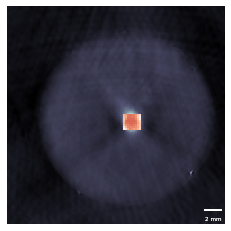

In [4]:
# We can visualise the so2 on top of the reconstructions
r = pa.get_scan_reconstructions()
s = pa.get_scan_so2()

fig, ax = plt.subplots()
r.imshow(roi_mask=roi, mask_roi=False, ax=ax)
s.imshow(roi_mask=roi, mask_roi=True, clim=(0,0.5), ax=ax)
plt.show()

In [5]:
# Spectra can be extracted like so:

mask, recon_slice = roi.to_mask_slice(r)

# recon_slice is a (sliced) reconstruction and mask is a numpy array.
# The Numpy representation of recon_slice can be accessed by raw_data.
print(recon_slice.raw_data.shape, mask.shape)

(1, 71, 333, 333, 1) (333, 333, 1)


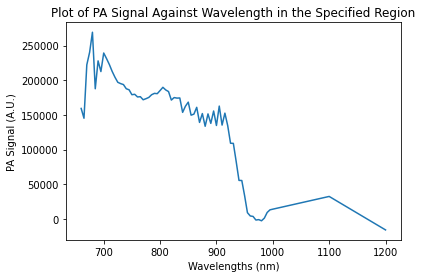

In [6]:
mask_applied = recon_slice.raw_data[0].T[mask.T]
plt.plot(pa.get_wavelengths(), np.mean(mask_applied, axis=0))
plt.xlabel("Wavelengths (nm)")
plt.ylabel("PA Signal (A.U.)")
plt.title("Plot of PA Signal Against Wavelength in the Specified Region")
plt.show()